<a href="https://colab.research.google.com/github/KazumaShachou/Machine_And_DeepLeaning/blob/master/MNIST2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras.datasets import mnist  #base de dados Mnist
from tensorflow.python.keras import Sequential  #Modelo de rede neural
from tensorflow.python.keras.layers import Dense, Dropout   #Neuronios(base de rede) e regularizador(evita overfit)
from tensorflow.compat.v1.keras.optimizers import RMSprop  #Otimizador (back propagation)

In [2]:
#carregando os dados de treino e teste

(x_treino, y_treino), (x_teste, y_test) = mnist.load_data()

In [3]:
print('Quantidade de imagens para treino :', len(x_treino))
print('Quantidade de imagens para teste :', len(x_teste))

Quantidade de imagens para treino : 60000
Quantidade de imagens para teste : 10000


In [4]:
primeira_imagem = x_treino[0]
print(primeira_imagem)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [5]:
print('o formato da primeira imagem', primeira_imagem.shape, type(primeira_imagem.shape))

o formato da primeira imagem (28, 28) <class 'tuple'>


Essa imagem representa 6


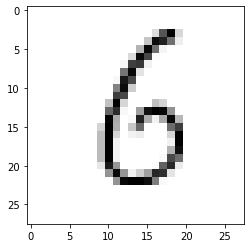

In [6]:
import matplotlib.pyplot as plt

indice = 18
print('Essa imagem representa', y_treino[indice])
plt.imshow(x_treino[indice], cmap=plt.cm.binary)
plt.show()

In [7]:
#achatando a matriz de pixels e transformando em uma unica lista

quantidade_treino = len(x_treino)
quantidade_teste = len(x_teste)

resolucao_imagem = x_treino[0].shape  #28,28
resolucao_total = resolucao_imagem[0] * resolucao_imagem[1]  #28*28 = 784

x_treino = x_treino.reshape(quantidade_treino, resolucao_total	)    #x_treino foi achatado aqui, pelo reshape(mudando formato)
x_teste = x_treino.reshape(quantidade_treino, resolucao_total	)    #so executar 1 vez ou pode dar erro, se for usar novamente, executar de novo do 0


In [8]:
#255 vira 1
#127 vira 0.5
#0 é 0

#imagem fornece 255 de valor maximo, vamos normaliza-lo

x_treino = x_treino.astype('float32')
y_treino = x_treino.astype('float32')

In [ ]:
x_treino /= 255
x_teste /=  255
print(x_treino[0][350], type(x_treino[0][350]))    #não executar de novo, ou dara erro

In [11]:
#vizualizar os dados normalizados
print('Dados normalizados', x_treino[0])

Dados normalizados [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0